In [6]:
#Import libraries 
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


#Load data into dataframe df 
data=pd.read_csv(r"C:\Users\ibast\Obesity-Risk-Scoring-Enhancing-Health-Insurance-Plans\data\raw\ObesityDataSet.csv")
data.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
df = pd.DataFrame(data)

# Add a new column 'ID' as serial numbers starting from 0
df['ID'] = range(1, len(df) + 1)

print(df)

      Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE  

In [9]:
#Body fat classification is determined by body mass index (BMI), so I calculated BMI and added each individual's BMI as a new column
data['BMI'] = data['Weight']/(data['Height']**2)

# BMI immediately after Height and Weight
data = data[['Gender', 'Age', 'Height', 'Weight','BMI','family_history_with_overweight','FAVC','FCVC','NCP','CAEC','SMOKE','CH2O','SCC', 'FAF','TUE','CALC','MTRANS','NObeyesdad']]

data.head()


,Gender,Age,Height,Weight,BMI,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,24.386526,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,24.238227,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,23.765432,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,26.851852,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,28.342381,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [10]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'ID'],
      dtype='object')

In [11]:
#array dimensions
data.shape

(2111, 18)

In [12]:

dup_data = data[data.duplicated()]
print(dup_data.shape)

#Drop duplicates
df = data.drop_duplicates(keep='last')
df.shape

(24, 18)


(2087, 18)

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["NObeyesdad_grade"]=encoder.fit_transform(df["NObeyesdad"])
df["Gender_id"]=encoder.fit_transform(df["Gender"])
df.head()

,Gender,Age,Height,Weight,BMI,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,NObeyesdad_grade,Gender_id
0,Female,21.0,1.62,64.0,24.386526,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,1,0
1,Female,21.0,1.52,56.0,24.238227,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1,0
2,Male,23.0,1.80,77.0,23.765432,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,1,1
3,Male,27.0,1.80,87.0,26.851852,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,5,1
4,Male,22.0,1.78,89.8,28.342381,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,6,1


<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   BMI                             2087 non-null   float64
 5   family_history_with_overweight  2087 non-null   object 
 6   FAVC                            2087 non-null   object 
 7   FCVC                            2087 non-null   float64
 8   NCP                             2087 non-null   float64
 9   CAEC                            2087 non-null   object 
 10  SMOKE                           2087 non-null   object 
 11  CH2O                            2087 non-null   float64
 12  SCC                             2087 no

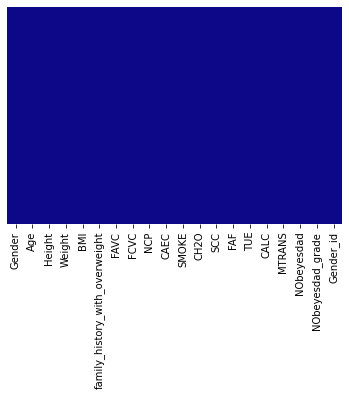

In [16]:
#Check if there are any missing values
sn.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='plasma')

#Summarize dataframe df
df.info()

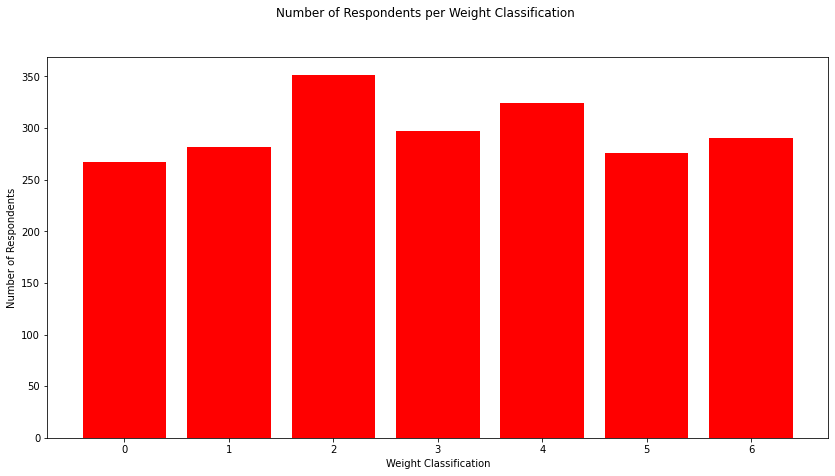

In [17]:
fig = plt.figure(figsize = (14, 7))
fig.suptitle("Number of Respondents per Weight Classification")

#Count the number of datapoints attributed with each weight category
counts = df["NObeyesdad_grade"].value_counts()
plt.bar(counts.index, counts.values, color="red")
plt.xlabel("Weight Classification")
plt.ylabel("Number of Respondents")
plt.show()

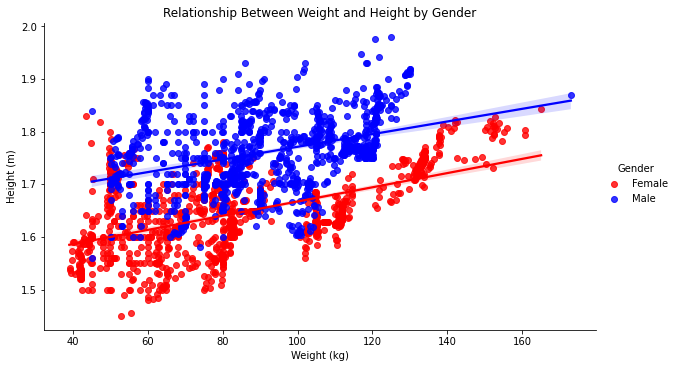

In [18]:
sn.lmplot(x="Weight", y="Height", hue="Gender", data=df,  
          palette=dict(Female="red", Male="blue"), height=5, aspect=1.7, x_jitter=.1)
plt.title('Relationship Between Weight and Height by Gender')
plt.xlabel("Weight (kg)")
plt.ylabel("Height (m)")
plt.show()

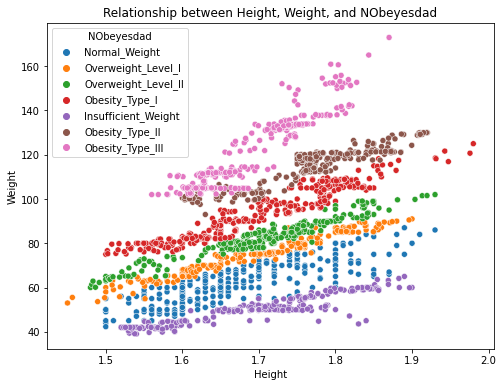

In [19]:
plt.figure(figsize=(8, 6))
sn.scatterplot(x='Height', y='Weight', hue='NObeyesdad', data=df)
plt.title('Relationship between Height, Weight, and NObeyesdad')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [20]:
summary_df = df.drop(columns=["Gender_id"]).describe()

# Apply background gradient styling
summary_df.style.background_gradient(cmap="viridis")


,Age,Height,Weight,BMI,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad_grade
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,29.765758,2.421466,2.701179,2.004749,1.012812,0.663035,3.014375
std,6.368801,0.093186,26.190847,8.024934,0.534737,0.764614,0.608284,0.853475,0.608153,1.948470
min,14.000000,1.450000,39.000000,12.998685,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,24.368897,2.000000,2.697467,1.590922,0.124505,0.000000,1.000000
50%,22.847618,1.701584,83.101100,28.896224,2.396265,3.000000,2.000000,1.000000,0.630866,3.000000
75%,26.000000,1.769491,108.015907,36.095538,3.000000,3.000000,2.466193,1.678102,1.000000,5.000000
max,61.000000,1.980000,173.000000,50.811753,3.000000,4.000000,3.000000,3.000000,2.000000,6.000000


In [21]:
summary_df.corr()

,Age,Height,Weight,BMI,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad_grade
Age,1.000000,0.999770,0.999095,0.999966,0.999778,0.999785,0.999778,0.999782,0.999774,0.999801
Height,0.999770,1.000000,0.998022,0.999846,1.000000,1.000000,1.000000,0.999999,1.000000,0.999997
Weight,0.999095,0.998022,1.000000,0.998960,0.998052,0.998070,0.998049,0.998058,0.998033,0.998132
BMI,0.999966,0.999846,0.998960,1.000000,0.999855,0.999860,0.999853,0.999854,0.999847,0.999874
FCVC,0.999778,1.000000,0.998052,0.999855,1.000000,1.000000,1.000000,0.999999,1.000000,0.999998
NCP,0.999785,1.000000,0.998070,0.999860,1.000000,1.000000,1.000000,0.999999,0.999999,0.999998
CH2O,0.999778,1.000000,0.998049,0.999853,1.000000,1.000000,1.000000,1.000000,1.000000,0.999998
FAF,0.999782,0.999999,0.998058,0.999854,0.999999,0.999999,1.000000,1.000000,1.000000,0.999999
TUE,0.999774,1.000000,0.998033,0.999847,1.000000,0.999999,1.000000,1.000000,1.000000,0.999998
NObeyesdad_grade,0.999801,0.999997,0.998132,0.999874,0.999998,0.999998,0.999998,0.999999,0.999998,1.000000


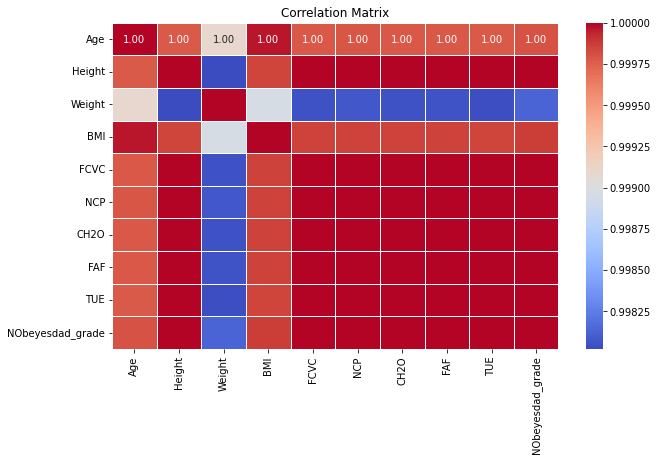

In [22]:
plt.figure(figsize=(10, 6))
sn.heatmap(summary_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [25]:
def showplot(column_name):
    plt.figure(figsize=(8, 6))
    sn.countplot(data=df, x=column_name, palette='viridis')
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x labels if needed
    plt.show()

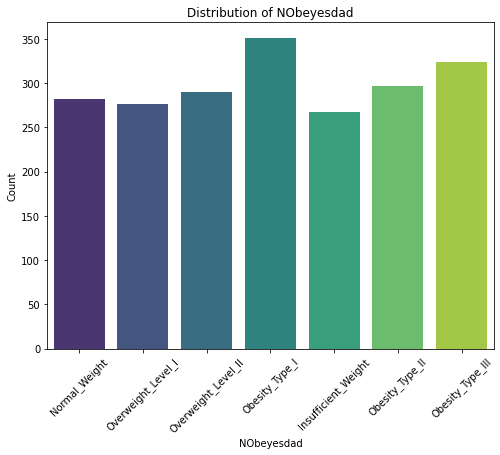

In [26]:
showplot("NObeyesdad")

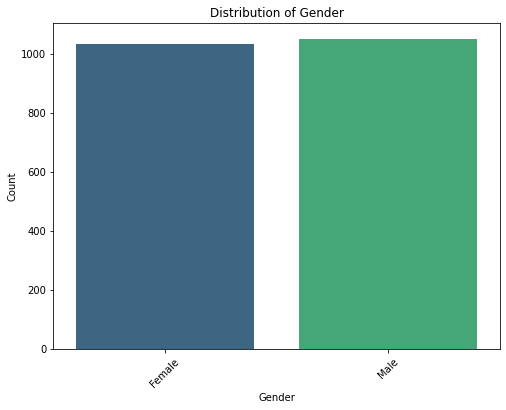

In [27]:
showplot('Gender')

In [28]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["NObeyesdad"]=encoder.fit_transform(df["NObeyesdad"])
df["Gender"]=encoder.fit_transform(df["Gender"])
df.head()

,Gender,Age,Height,Weight,BMI,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,NObeyesdad_grade,Gender_id
0,0,21.0,1.62,64.0,24.386526,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,1,1,0
1,0,21.0,1.52,56.0,24.238227,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,1,1,0
2,1,23.0,1.80,77.0,23.765432,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,1,1,1
3,1,27.0,1.80,87.0,26.851852,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,5,5,1
4,1,22.0,1.78,89.8,28.342381,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,6,6,1


In [29]:
category_order=['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight','Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I']



<Axes: xlabel='Gender_id', ylabel='count'>

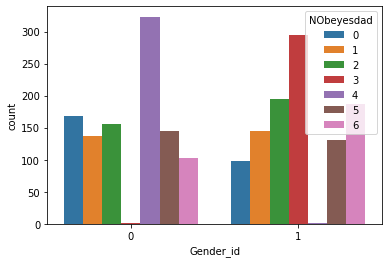

In [30]:
sn.countplot(x="Gender_id",hue="NObeyesdad",data=df)

In [31]:
df['NObeyesdad'].value_counts().index

Index([2, 4, 3, 6, 1, 5, 0], dtype='int64', name='NObeyesdad')

In [32]:
df.value_counts(ascending=False)

Gender  Age        Height    Weight     BMI        family_history_with_overweight  FAVC  FCVC      NCP       CAEC        SMOKE  CH2O      SCC  FAF       TUE       CALC        MTRANS                 NObeyesdad  NObeyesdad_grade  Gender_id
1       56.000000  1.790000  90.000000  28.089011  yes                             no    2.000000  3.000000  Sometimes   yes    2.000000  no   1.000000  0.000000  Frequently  Automobile             6           6                 1            1
0       15.000000  1.650000  86.000000  31.588613  yes                             yes   3.000000  3.000000  Sometimes   no     1.000000  no   3.000000  2.000000  no          Walking                2           2                 0            1
        16.000000  1.550000  45.000000  18.730489  no                              yes   2.000000  3.000000  Frequently  no     2.000000  no   1.000000  1.000000  no          Public_Transportation  1           1                 0            1
                   1.570000  49.0

In [33]:
df['NObeyesdad'].nunique()

7

In [34]:
X = df.drop(['NObeyesdad', 'Gender'], axis=1)
y = df['NObeyesdad']

In [35]:
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [41]:
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'BMI',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [42]:
from sklearn.model_selection import train_test_split

features=df.drop(["Gender","NObeyesdad"],axis=1).copy()
labels=df["NObeyesdad"]



In [43]:
features.columns

Index(['Age', 'Height', 'Weight', 'BMI', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad_grade', 'Gender_id'],
      dtype='object')

In [44]:
labels

0       1
1       1
2       1
3       5
4       6
       ..
2106    4
2107    4
2108    4
2109    4
2110    4
Name: NObeyesdad, Length: 2087, dtype: int64

In [45]:
X_train,X_test,y_train,y_test=train_test_split(features,labels,random_state=42,test_size=0.2)

X_train.shape



(1669, 18)

In [46]:
X_test.shape

y_train.shape

y_test.shape

X_train.info()



<class 'pandas.core.frame.DataFrame'>
Index: 1669 entries, 44 to 882
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1669 non-null   float64
 1   Height                          1669 non-null   float64
 2   Weight                          1669 non-null   float64
 3   BMI                             1669 non-null   float64
 4   family_history_with_overweight  1669 non-null   object 
 5   FAVC                            1669 non-null   object 
 6   FCVC                            1669 non-null   float64
 7   NCP                             1669 non-null   float64
 8   CAEC                            1669 non-null   object 
 9   SMOKE                           1669 non-null   object 
 10  CH2O                            1669 non-null   float64
 11  SCC                             1669 non-null   object 
 12  FAF                             1669 no

In [47]:
X_train.columns

Index(['Age', 'Height', 'Weight', 'BMI', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad_grade', 'Gender_id'],
      dtype='object')

In [48]:

scale = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O','FAF', 'TUE']
ohe = [ 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


In [49]:
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(), ohe)
    ])

In [50]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [51]:
label = LabelEncoder()
y_train_label = label.fit_transform(y_train)
y_test_label = label.transform(y_val)

In [52]:
pipeline.fit(X_train, y_train_label)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE']),
                                                 ('ohe', OneHotEncoder(),
                                                  ['family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC',
                                                   'MTRANS'])])),
                ('classifier', RandomForestClassifier())])

In [54]:

accuracy = pipeline.score(X_val, y_test_label)
print(f'Model Accuracy: {accuracy}')


Model Accuracy: 0.9282296650717703


In [55]:
from sklearn.linear_model import LogisticRegression
pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])
pipeline_lr.fit(X_train, y_train_label)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE']),
                                                 ('ohe', OneHotEncoder(),
                                                  ['family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC',
                                                   'MTRANS'])])),
                ('classifier', LogisticRegression())])

In [56]:
accuracy_lr = pipeline_lr.score(X_val, y_test_label)
print(f'LogisticRegression Accuracy: {accuracy_lr}')

LogisticRegression Accuracy: 0.8851674641148325


In [57]:
from sklearn.tree import DecisionTreeClassifier
pipeline_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])
pipeline_dt.fit(X_train, y_train_label)
accuracy_dt = pipeline_dt.score(X_val, y_test_label)
print(f'DecisionTreeClassifier Accuracy: {accuracy_dt}')

DecisionTreeClassifier Accuracy: 0.9521531100478469


In [58]:
from sklearn.neighbors import KNeighborsClassifier
pipeline_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])
pipeline_knn.fit(X_train, y_train_label)
accuracy_knn = pipeline_knn.score(X_val, y_test_label)
print(f'KNeighborsClassifier Accuracy: {accuracy_knn}')

KNeighborsClassifier Accuracy: 0.8492822966507177


In [59]:


from sklearn.ensemble import GradientBoostingClassifier
pipeline_gb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier())
])
pipeline_gb.fit(X_train, y_train_label)
accuracy_gb = pipeline_gb.score(X_val, y_test_label)
print(f'GradientBoostingClassifier Accuracy: {accuracy_gb}')



GradientBoostingClassifier Accuracy: 0.9760765550239234


In [60]:

from sklearn.ensemble import AdaBoostClassifier
pipeline_ab = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier())
])
pipeline_ab.fit(X_train, y_train_label)
accuracy_ab = pipeline_ab.score(X_val, y_test_label)
print(f'AdaBoostClassifier Accuracy: {accuracy_ab}')



AdaBoostClassifier Accuracy: 0.2799043062200957


In [61]:
from xgboost import XGBClassifier
pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier())
])
pipeline_xgb.fit(X_train, y_train_label)
accuracy_xgb = pipeline_xgb.score(X_val, y_test_label)
print(f'XGBClassifier Accuracy: {accuracy_xgb}')

XGBClassifier Accuracy: 0.9688995215311005


In [62]:
from sklearn.neural_network import MLPClassifier
pipeline_mlp = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier())
])
pipeline_mlp.fit(X_train, y_train_label)
accuracy_mlp = pipeline_mlp.score(X_val, y_test_label)
print(f'MLPClassifier Accuracy: {accuracy_mlp}')

MLPClassifier Accuracy: 0.937799043062201


In [63]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

# Define individual pipelines for both classifiers
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Combine them using a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', pipeline_rf),
    ('lr', pipeline_lr)
], voting='soft')  # You can use 'hard' for majority voting or 'soft' for probabilities

# Fit the combined model
voting_clf.fit(X_train, y_train_label)

# Check the accuracy on the validation set
accuracy_voting = voting_clf.score(X_val, y_test_label)
print(f'VotingClassifier Accuracy (RandomForest + LogisticRegression): {accuracy_voting}')

VotingClassifier Accuracy (RandomForest + LogisticRegression): 0.9449760765550239


In [64]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(voting_clf, X_train, y_train_label, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Cross-Validation Score: {scores.mean()}")

Cross-Validation Scores: [0.93113772 0.92215569 0.92215569        nan 0.94594595]
Mean Cross-Validation Score: nan


In [65]:
num_data=['Age', 'Height', 'Weight','FCVC', 'NCP','CH2O', 'FAF', 'TUE',]
cat_data=['Gender','family_history_with_overweight','FAVC', 'CAEC', 'SMOKE','SCC', 'CALC', 'MTRANS']

In [66]:
training=pd.get_dummies(df, columns=["Gender","SMOKE", "family_history_with_overweight",
                                        "FAVC", "SCC", "CAEC","CALC", "MTRANS"], drop_first=True)
training

,Age,Height,Weight,BMI,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,...,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.000000,1.620000,64.000000,24.386526,2.0,3.0,2.000000,0.000000,1.000000,1,...,False,True,False,False,False,True,False,False,True,False
1,21.000000,1.520000,56.000000,24.238227,3.0,3.0,3.000000,3.000000,0.000000,1,...,False,True,False,False,True,False,False,False,True,False
2,23.000000,1.800000,77.000000,23.765432,2.0,3.0,2.000000,2.000000,1.000000,1,...,False,True,False,True,False,False,False,False,True,False
3,27.000000,1.800000,87.000000,26.851852,3.0,3.0,2.000000,2.000000,0.000000,5,...,False,True,False,True,False,False,False,False,False,True
4,22.000000,1.780000,89.800000,28.342381,2.0,1.0,2.000000,0.000000,0.000000,6,...,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,44.901475,3.0,3.0,1.728139,1.676269,0.906247,4,...,False,True,False,False,True,False,False,False,True,False
2107,21.982942,1.748584,133.742943,43.741923,3.0,3.0,2.005130,1.341390,0.599270,4,...,False,True,False,False,True,False,False,False,True,False
2108,22.524036,1.752206,133.689352,43.543817,3.0,3.0,2.054193,1.414209,0.646288,4,...,False,True,False,False,True,False,False,False,True,False
2109,24.361936,1.739450,133.346641,44.071535,3.0,3.0,2.852339,1.139107,0.586035,4,...,False,True,False,False,True,False,False,False,True,False


In [67]:
from sklearn.preprocessing import StandardScaler
df_standard = StandardScaler()
df_copied = training.copy()
df_standard.fit(df_copied[['Age', 'Weight']])
df_std = pd.DataFrame(df_standard.transform(df_copied[['Age', 'Weight']]))
df_std

,0,1
0,-0.526613,-0.872985
1,-0.526613,-1.178508
2,-0.212507,-0.376509
3,0.415705,0.005395
4,-0.369560,0.112328
...,...,...
2082,-0.530250,1.701376
2083,-0.372239,1.790528
2084,-0.287258,1.788482
2085,0.001389,1.775393


In [68]:
training[['Age','Weight'] ] = df_std
training

,Age,Height,Weight,BMI,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,...,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,-0.526613,1.620000,-0.872985,24.386526,2.0,3.0,2.000000,0.000000,1.000000,1,...,False,True,False,False,False,True,False,False,True,False
1,-0.526613,1.520000,-1.178508,24.238227,3.0,3.0,3.000000,3.000000,0.000000,1,...,False,True,False,False,True,False,False,False,True,False
2,-0.212507,1.800000,-0.376509,23.765432,2.0,3.0,2.000000,2.000000,1.000000,1,...,False,True,False,True,False,False,False,False,True,False
3,0.415705,1.800000,0.005395,26.851852,3.0,3.0,2.000000,2.000000,0.000000,5,...,False,True,False,True,False,False,False,False,False,True
4,-0.369560,1.780000,0.112328,28.342381,2.0,1.0,2.000000,0.000000,0.000000,6,...,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,NaN,1.710730,NaN,44.901475,3.0,3.0,1.728139,1.676269,0.906247,4,...,False,True,False,False,True,False,False,False,True,False
2107,NaN,1.748584,NaN,43.741923,3.0,3.0,2.005130,1.341390,0.599270,4,...,False,True,False,False,True,False,False,False,True,False
2108,NaN,1.752206,NaN,43.543817,3.0,3.0,2.054193,1.414209,0.646288,4,...,False,True,False,False,True,False,False,False,True,False
2109,NaN,1.739450,NaN,44.071535,3.0,3.0,2.852339,1.139107,0.586035,4,...,False,True,False,False,True,False,False,False,True,False


In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming 'df' is your DataFrame and 'NObeyesdad' is the target column
X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lin_reg = LinearRegression()

# Fit the model
lin_reg.fit(X_train, y_train)

# Predict on the test data
y_pred_reg = lin_reg.predict(X_test)

# Evaluation
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_reg))
print(f"Linear Regression R^2 Score: {r2_score(y_test, y_pred_reg)}")


Linear Regression MSE: 1.8182125023387952e-29
Linear Regression R^2 Score: 1.0


Insights for Insurance Buyers:
Mean Squared Error (MSE) and R-squared values show the accuracy of BMI prediction.
Feature Importance: The coefficients give insight into which factors (e.g., smoking, physical activity) have the greatest impact on BMI.
Example: If the coefficient of the "smoking" feature is positive, smoking contributes to a higher BMI, which can lead to higher insurance premiums.
Recommendations: Insurers can use this data to offer incentives for healthier behavior to reduce insurance costs.

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.88      0.78        60
           1       0.64      0.48      0.55        66
           2       0.94      0.94      0.94        64
           3       0.97      0.95      0.96        64
           4       0.98      0.98      0.98        61
           5       0.82      0.82      0.82        55
           6       0.82      0.83      0.82        48

    accuracy                           0.84       418
   macro avg       0.84      0.84      0.84       418
weighted avg       0.84      0.84      0.84       418

KNN Accuracy: 0.8397129186602871
Confusion Matrix:
[[53  7  0  0  0  0  0]
 [21 32  2  1  0  5  5]
 [ 1  2 60  0  0  0  1]
 [ 0  2  0 61  1  0  0]
 [ 0  0  0  1 60  0  0]
 [ 1  4  2  0  0 45  3]
 [ 0  3  0  0  0  5 40]]


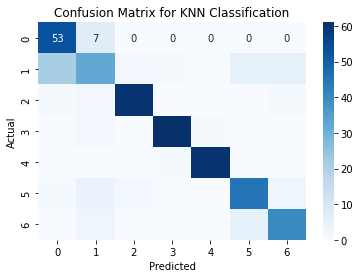

In [78]:

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


#  'NObeyesdad' is the target column
X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_knn = knn.predict(X_test_scaled)

print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Accuracy
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn)}")

# Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)

# Confusion matrix heatmap visualization
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix for KNN Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Insights for Insurance Buyers:
Confusion Matrix: We can identify how many individuals with specific obesity levels are correctly predicted, and where the model is making errors.
Recommendation: Individuals classified as high-risk (obesity) can be advised to adopt healthier habits (e.g., quit smoking or increase physical activity) to lower their insurance premiums.


In [79]:
df

,Gender,Age,Height,Weight,BMI,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,NObeyesdad_grade,Gender_id
0,0,21.000000,1.620000,64.000000,24.386526,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,1,1,0
1,0,21.000000,1.520000,56.000000,24.238227,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,1,1,0
2,1,23.000000,1.800000,77.000000,23.765432,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,1,1,1
3,1,27.000000,1.800000,87.000000,26.851852,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,5,5,1
4,1,22.000000,1.780000,89.800000,28.342381,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,6,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,44.901475,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,4,4,0
2107,0,21.982942,1.748584,133.742943,43.741923,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,4,4,0
2108,0,22.524036,1.752206,133.689352,43.543817,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,4,4,0
2109,0,24.361936,1.739450,133.346641,44.071535,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,4,4,0
